# Task
Write Python code to build, train, and evaluate an image classification model on the Fashion MNIST dataset, and include code for inference.

## Load and preprocess data

### Subtask:
Load the Fashion MNIST dataset and preprocess it for model training.


**Reasoning**:
The subtask requires loading and preprocessing the Fashion MNIST dataset. This involves importing the dataset, loading the data, normalizing the pixel values, and reshaping the images to include a channel dimension. These steps can be combined into a single code block.



In [1]:
import tensorflow as tf

# 1. Import the fashion_mnist dataset from tensorflow.keras.datasets.
fashion_mnist = tf.keras.datasets.fashion_mnist

# 2. Load the training and test data.
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 3. Normalize the image data.
train_images = train_images / 255.0
test_images = test_images / 255.0

# 4. Reshape the image data to add a channel dimension.
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

print("Training images shape:", train_images.shape)
print("Test images shape:", test_images.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training images shape: (60000, 28, 28, 1)
Test images shape: (10000, 28, 28, 1)


## Build model

### Subtask:
Build a convolutional neural network (CNN) model for image classification.


**Reasoning**:
Build a sequential CNN model with convolutional, pooling, flatten, and dense layers as described in the instructions.



In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# 2. Create a tf.keras.Sequential model.
model = Sequential()

# 3. Add a Conv2D layer.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# 4. Add a MaxPooling2D layer.
model.add(MaxPooling2D((2, 2)))

# 5. Add another Conv2D and MaxPooling2D layer.
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# 6. Flatten the output.
model.add(Flatten())

# 7. Add Dense layers.
model.add(Dense(128, activation='relu'))

# 8. Add the final Dense layer.
model.add(Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## Compile and train model

### Subtask:
Compile the model with an appropriate optimizer and loss function, then train it on the preprocessed data.


**Reasoning**:
Compile and train the model using the specified optimizer, loss function, metrics, and data.



In [3]:
# 1. Compile the model.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 2. Train the model.
epochs = 10
history = model.fit(train_images, train_labels, epochs=epochs,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7768 - loss: 0.6180 - val_accuracy: 0.8687 - val_loss: 0.3538
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.8851 - loss: 0.3109 - val_accuracy: 0.8863 - val_loss: 0.3102
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9045 - loss: 0.2542 - val_accuracy: 0.8978 - val_loss: 0.2789
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9175 - loss: 0.2214 - val_accuracy: 0.9040 - val_loss: 0.2692
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9260 - loss: 0.1981 - val_accuracy: 0.9124 - val_loss: 0.2459
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9380 - loss: 0.1685 - val_accuracy: 0.9082 - val_loss: 0.2589
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9439 - loss: 0.1498 - val_accuracy: 0.9106 - val_loss: 0.2695
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9495 - loss: 0.132

## Evaluate model

### Subtask:
Evaluate the trained model on the test set to assess its performance.

**Reasoning**:
Evaluate the trained model on the test dataset to assess its performance using the `evaluate` method.

In [4]:
# 1. Evaluate the model on the test dataset.
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

# 2. Print the test accuracy.
print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.9143 - loss: 0.2746

Test accuracy: 0.9143000245094299


## Inference

### Subtask:
Use the trained model to make predictions on new images.

**Reasoning**:
Make predictions on a few images from the test set using the trained model and display the results.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


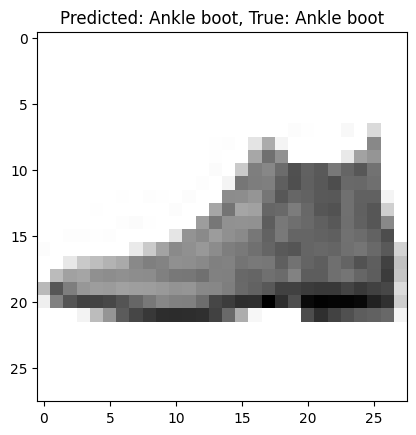

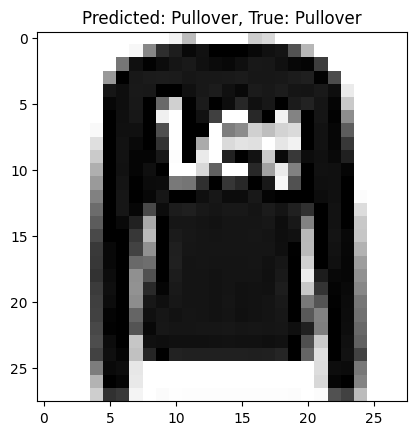

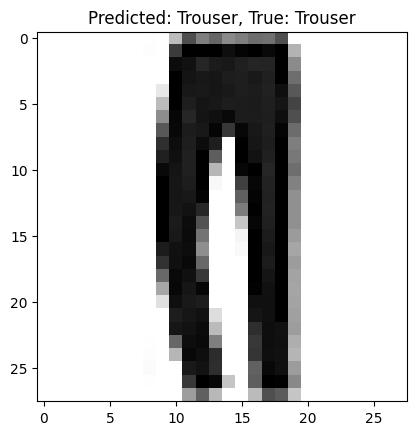

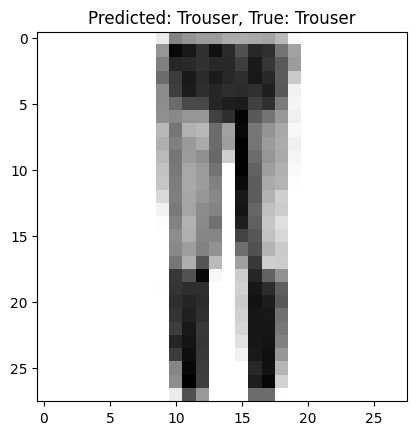

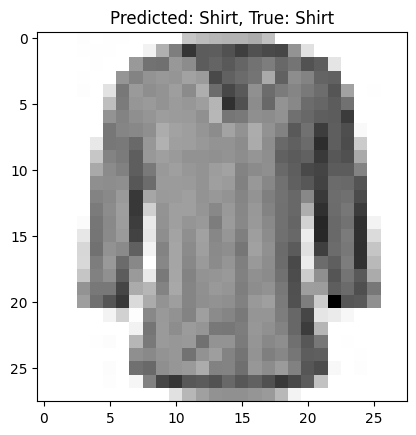

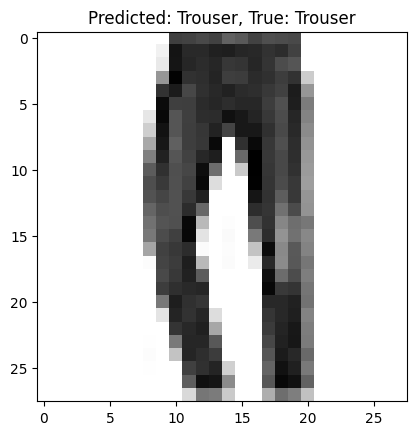

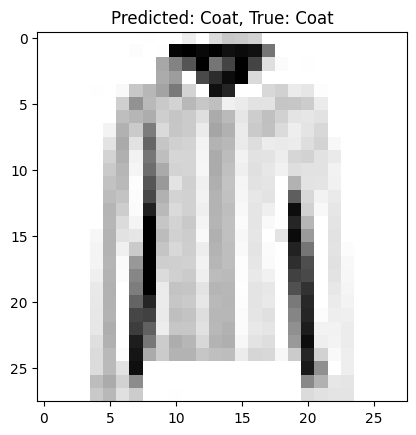

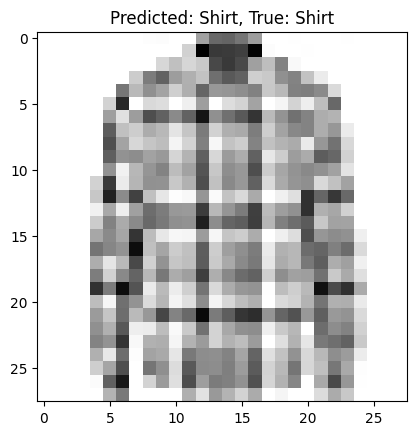

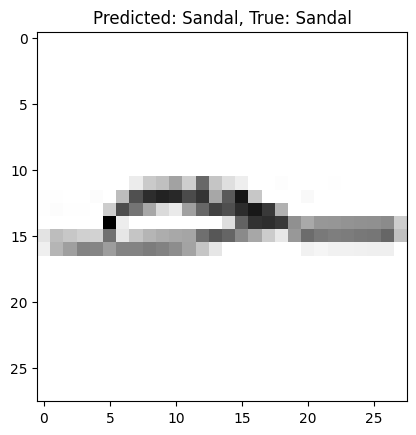

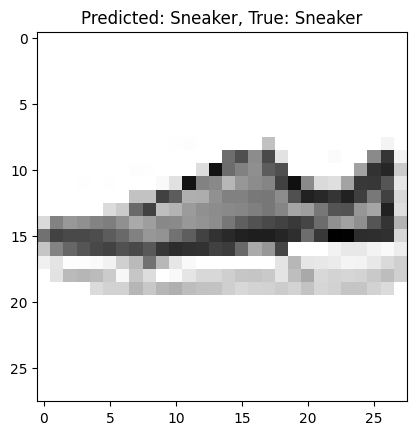

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the class names for the Fashion MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 1. Make predictions on a few images from the test set.
predictions = model.predict(test_images[:10])

# 2. Display the images and their predicted labels.
for i in range(10):
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[test_labels[i]]
    plt.title(f"Predicted: {predicted_label}, True: {true_label}")
    plt.show()